In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift

In [2]:
def latlon_to_xyz(lat, lon):
    lat, lon = np.radians(lat), np.radians(lon)  # Convert degrees to radians
    x = np.cos(lat) * np.cos(lon)
    y = np.cos(lat) * np.sin(lon)
    z = np.sin(lat)
    return np.vstack((x, y, z)).T

In [23]:
data = np.loadtxt("Test.txt")

In [24]:
# Extract latitudes and longitudes
latitudes = data[:, 0]
longitudes = data[:, 1]

# Convert to Cartesian coordinates
points = latlon_to_xyz(latitudes, longitudes)

In [25]:
bandwidth = 0.2  # Adjust for better separation (empirical tuning)
mean_shift = MeanShift(bandwidth=bandwidth)
labels = mean_shift.fit_predict(points)
num_clusters = len(np.unique(labels))
print(f"Optimal Number of Clusters (Mean Shift with vMF Kernel): {num_clusters}")

Optimal Number of Clusters (Mean Shift with vMF Kernel): 3


In [28]:
np.savetxt("lb.txt",labels)

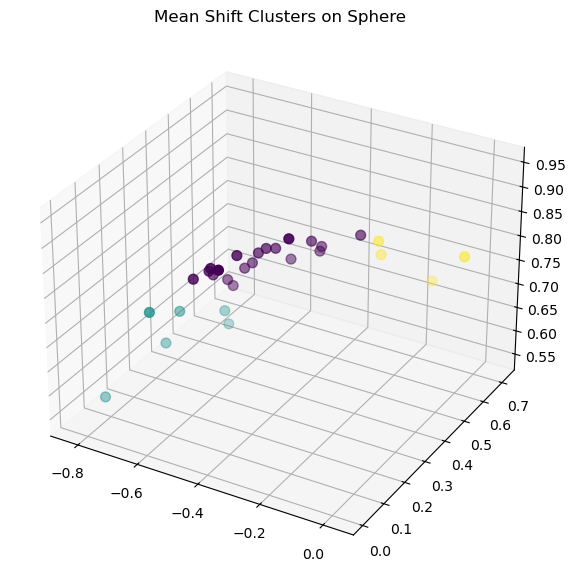

In [26]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title("Mean Shift Clusters on Sphere")
plt.show()